## Code to preprocess the data, and push data into huggingface

Link to data: https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news

In [1]:
from datasets import load_dataset, Dataset, DatasetDict
from huggingface_hub import login

from sklearn.model_selection import train_test_split

from dotenv import load_dotenv

import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

load_dotenv()

c:\Users\yjiah\Downloads\natural-language-processing\assignment_3_finetuning\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [2]:
# load data
df = pd.read_csv('./data/all-data.csv', encoding='ISO-8859-1', header=None, names=['label', 'sentence'])

In [3]:
df.head()

,label,sentence
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [4]:
df[df.isna().any(axis=1)] # look for NaN values if any

,label,sentence


### Encode sentiment into 0 for negative, 1 for neutral, 2 for positive

In [5]:
df['label'].value_counts()

label
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64

In [6]:
def encode_labels(x):
    if x == 'negative':
        return 0
    elif x == 'neutral':
        return 1
    else:
        return 2

In [7]:
df['label'] = df['label'].apply(lambda x: encode_labels(x))

In [8]:
df['label'].value_counts()

label
1    2879
2    1363
0     604
Name: count, dtype: int64

### Create train-validation-test splits

In [9]:
train_df, val_test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
val_df, test_df = train_test_split(val_test_df, test_size=0.5, stratify=val_test_df['label'], random_state=42)

train_df.reset_index(inplace=True)
val_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)

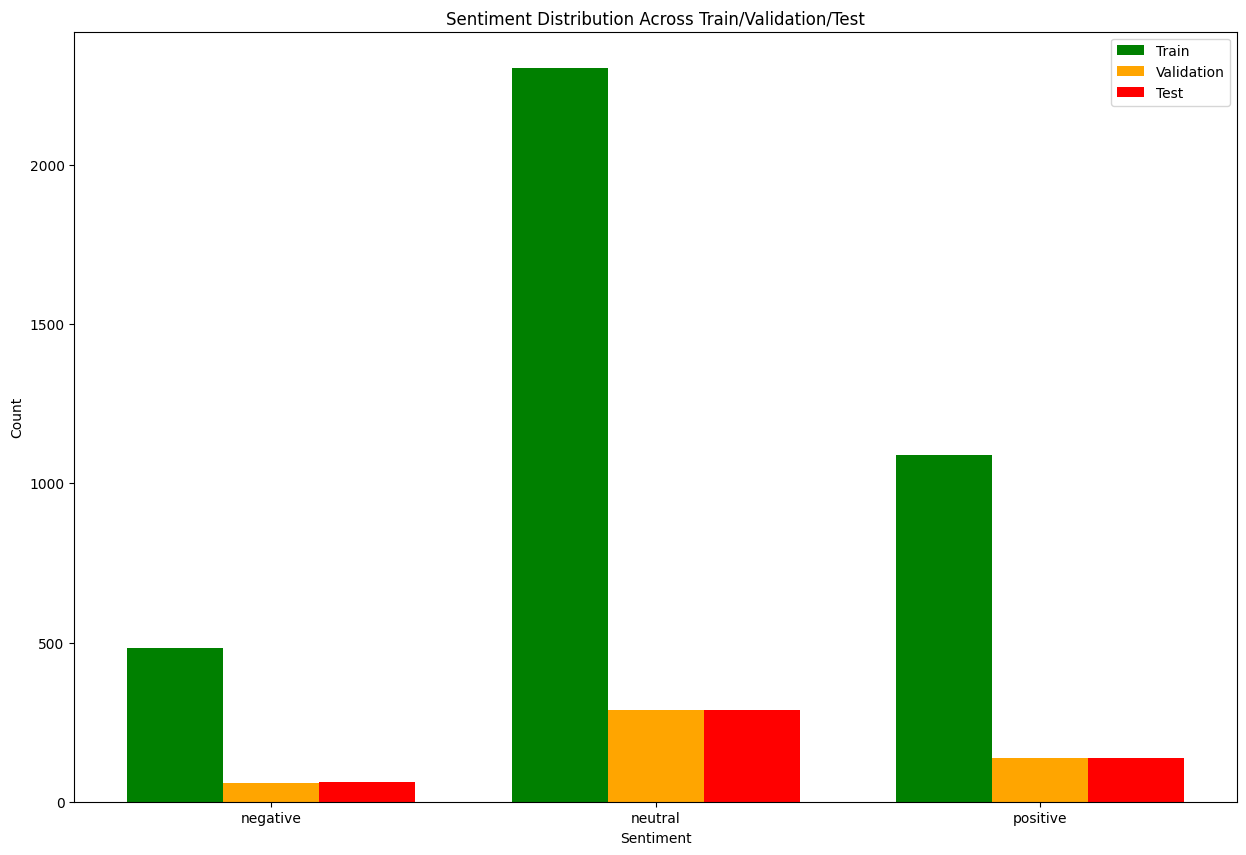

In [10]:
# plot the distributions of labels
# Count labels for each split
train_counts = train_df['label'].value_counts().sort_index()
val_counts = val_df['label'].value_counts().sort_index()
test_counts  = test_df['label'].value_counts().sort_index()

labels = ['negative', 'neutral', 'positive']  # map integers to text
x = np.arange(len(labels))  # label positions

width = 0.25  # width of each bar

plt.figure(figsize=(15, 10))
plt.bar(x - width, train_counts.values, width, label='Train', color='green')
plt.bar(x, val_counts.values, width, label='Validation', color='orange')
plt.bar(x + width, test_counts.values, width, label='Test', color='red')

plt.xticks(x, labels)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution Across Train/Validation/Test')
plt.legend()
plt.show()

### Push dataset to huggingface

In [11]:
login(token=os.getenv('HUGGINGFACE_API_KEY'))

In [12]:
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

In [13]:
# create the dataset
dataset = DatasetDict(
    {
        "train": train_dataset,
        "validation": val_dataset,
        "test": test_dataset
    }
)

In [14]:
dataset.push_to_hub("Jiahao123/FinancialPhraseBank_processed")

Uploading the dataset shards: 100%|██████████| 1/1 [00:01<00:00,  1.77s/ shards]
c:\Users\yjiah\Downloads\natural-language-processing\assignment_3_finetuning\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\yjiah\.cache\huggingface\hub\datasets--Jiahao123--FinancialPhraseBank_processed. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-

CommitInfo(commit_url='https://huggingface.co/datasets/Jiahao123/FinancialPhraseBank_processed/commit/470d4f0f0da56f80ce911d4b0400400159912627', commit_message='Upload dataset', commit_description='', oid='470d4f0f0da56f80ce911d4b0400400159912627', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/Jiahao123/FinancialPhraseBank_processed', endpoint='https://huggingface.co', repo_type='dataset', repo_id='Jiahao123/FinancialPhraseBank_processed'), pr_revision=None, pr_num=None)